In [1]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nPerClust = 100
blur = 1

A = [ 1,1 ]
B = [ 5,1 ]

a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur ]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

In [3]:
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

data_np = np.hstack((a,b)).T



In [4]:
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

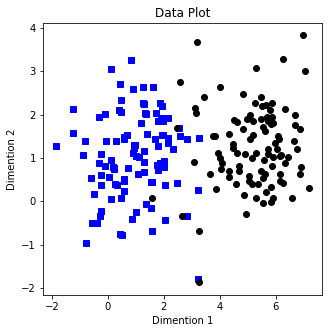

In [5]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('Data Plot')
plt.xlabel('Dimention 1')
plt.ylabel('Dimention 2')
plt.show();

In [6]:
class theClass4ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(2,1)
        self.output = nn.Linear(1,1)
    def forward(self,x):
        x = self.input(x)
        x = F.relu(x)
        x = self.output(x)
        x = torch.sigmoid(x)
        
        return x
    
ANNclassify = theClass4ANN()

In [7]:
learningrate=0.01

lossfun = nn.BCELoss()
optimizer=torch.optim.SGD(ANNclassify.parameters(),learningrate)

In [8]:
numepochs = 1000

losses = torch.zeros(numepochs)

for epochi in range(numepochs):
    
    yHat = ANNclassify(data)
    
    loss=lossfun(yHat,labels)
    losses[epochi]=loss
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

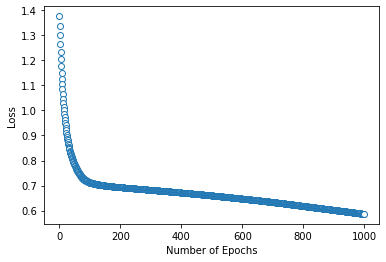

In [9]:
plt.plot(losses.detach(),'o',markerfacecolor='w')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show();

In [10]:
predictions=ANNclassify(data)

predlabels = predictions>0.5

missclassified = np.where(predlabels != labels)[0]

totalacc = 100-100*len(missclassified)/(2*nPerClust)

print('Final Accuracy: %g%%' %totalacc)

Final Accuracy: 77%


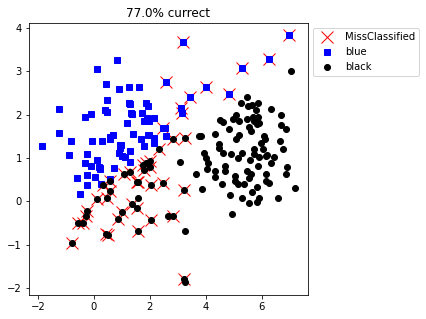

In [11]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[missclassified,0],data[missclassified,1],'rx',markersize=12)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0],data[np.where(predlabels)[0],1],'ko')

plt.legend(['MissClassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% currect')
plt.show()